In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
heart=pd.read_csv("heart_2020_cleaned.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
features = heart.iloc[:,1:]
features = pd.get_dummies(features)
features.values


array([[16.6 ,  3.  , 30.  , ...,  0.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [26.58, 20.  , 30.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [24.24,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [32.81,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [46.56,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ]])

In [4]:
heart_disase = heart.iloc[:,0:1]
heart_disase = pd.get_dummies(heart_disase)
heart_disase =  heart_disase.iloc[:,-1].values
heart_disase

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,heart_disase,test_size=0.2)

In [6]:
from sklearn.tree import DecisionTreeClassifier
heartTree = DecisionTreeClassifier(criterion="entropy")
heartTree

DecisionTreeClassifier(criterion='entropy')

In [7]:
heartTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
predTree = heartTree.predict(x_test)
predTree

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8661173564314639


Data Visualtion

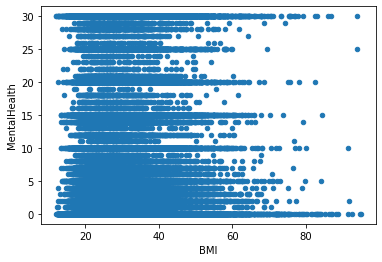

In [34]:
features.plot(x="BMI",y="MentalHealth",kind="scatter")
plt.show()

Mental Health are stack range 20 and 40.

In [ ]:
heart.plot(kind='scatter', x='AgeCategory', y='SleepTime')

In [59]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')